# Making scientific figures in Python with Matplotlib
## Tijs van Lieshout
## 2nd of February 2020

In [ ]:
print("An interactive demo/workshop!")

# Installation

In [ ]:
pip install matplotlib

In [1]:
import matplotlib.pyplot as plt

# Basics of matplotlib
## Explained with data from kittens

![Kitten](https://vetsonparker.com.au/wp-content/uploads/2017/08/kitten.jpg)

# The dataset
## Cat weight in kg by age in months

In [2]:
# data from https://www.healthynex.com/cat-weight-chart-by-age-in-kg-ib.html
cat_age_in_months = [1, 2, 3, 4, 5, 7, 9, 10, 11, 12]
cat_weight_in_kg = [0.8, 1.3, 1.8, 1.9, 1.9, 2.0, 2.1, 2.1, 2.2, 2.2]

In [3]:
print(len(cat_age_in_months) == len(cat_weight_in_kg))

True


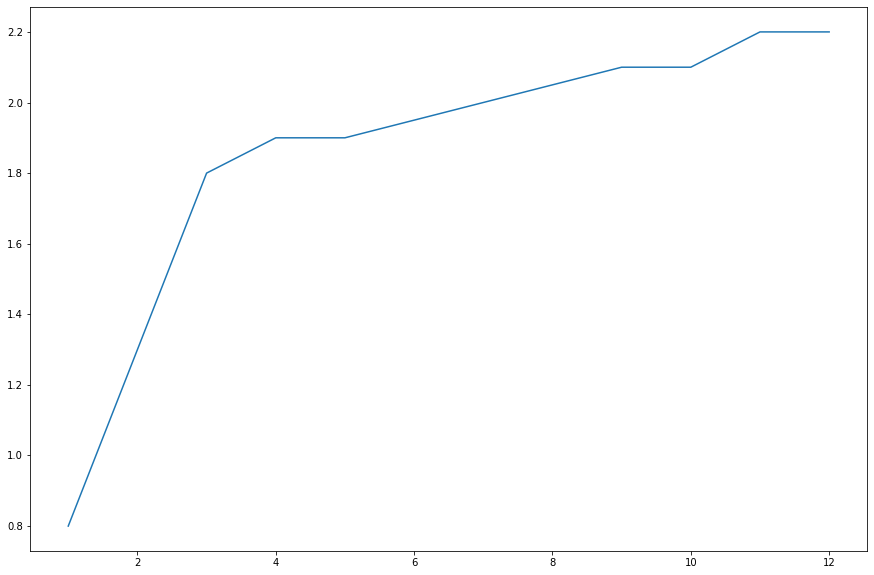

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(cat_age_in_months, cat_weight_in_kg)
plt.show()

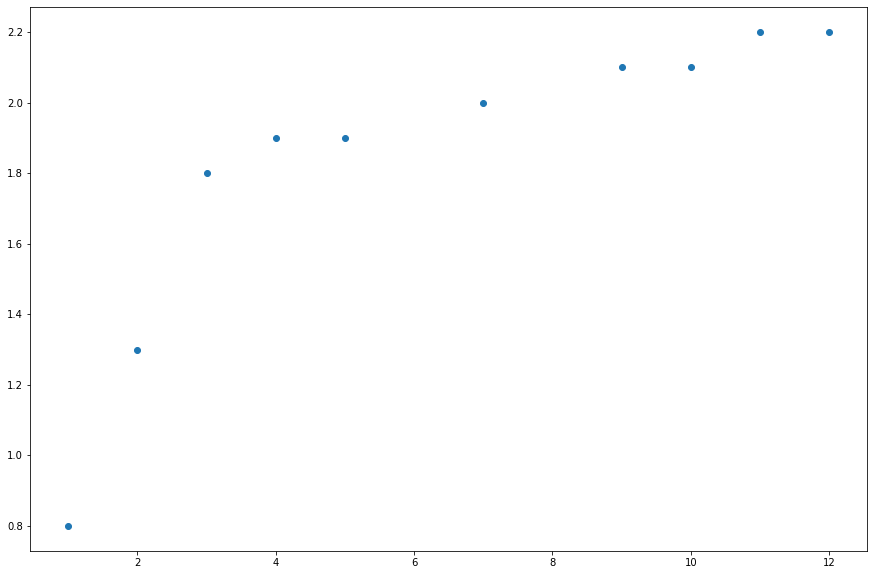

In [19]:
plt.figure(figsize=(15, 10))
# o, ro, k+, c--, mD
plt.plot(cat_age_in_months, cat_weight_in_kg, 'o')
plt.show()

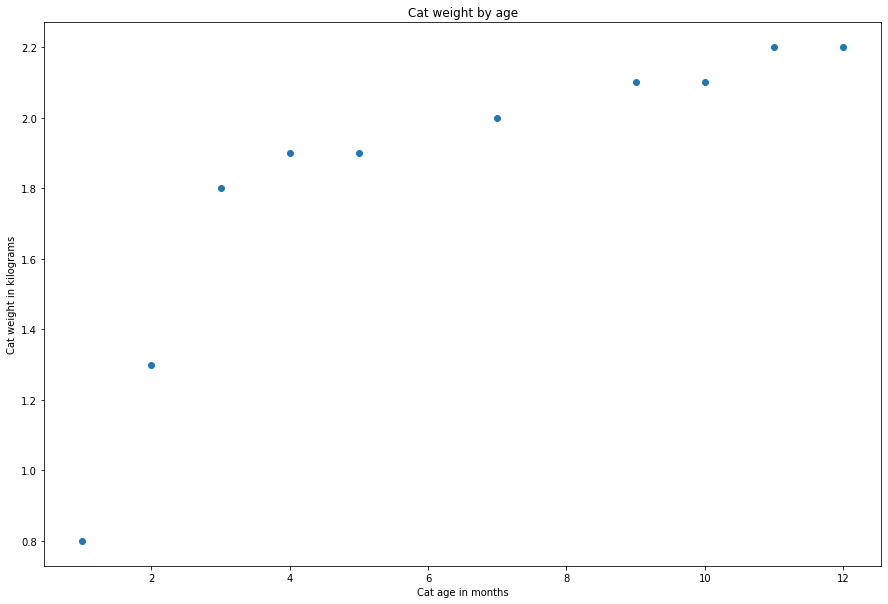

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(cat_age_in_months, cat_weight_in_kg, 'o')
plt.xlabel('Cat age in months')
plt.ylabel('Cat weight in kilograms')
plt.title("Cat weight by age")
plt.show()

In [22]:
plt.rcParams.update({'font.size': 22})

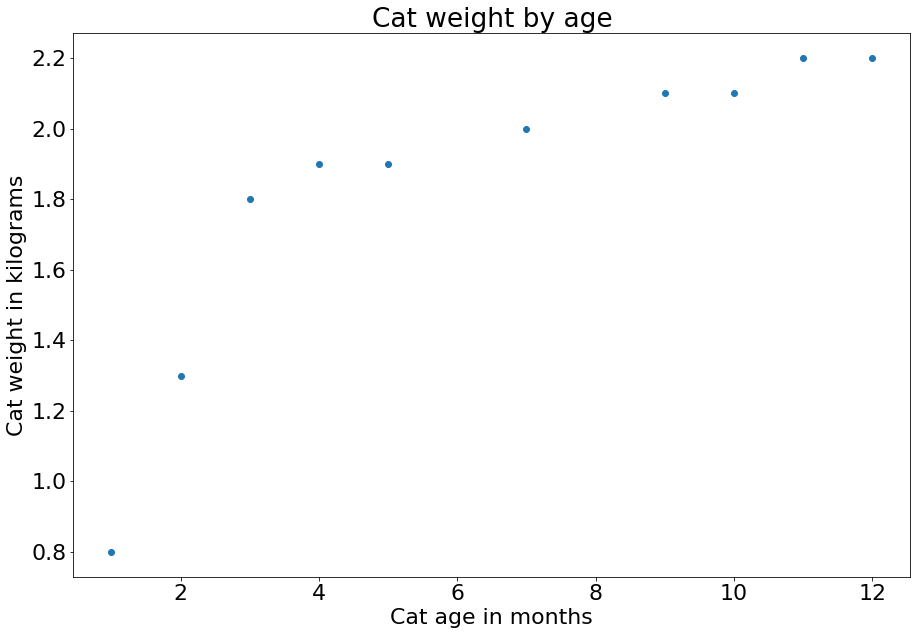

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(cat_age_in_months, cat_weight_in_kg, 'o')
plt.xlabel('Cat age in months')
plt.ylabel('Cat weight in kilograms')
plt.title("Cat weight by age")
plt.show()

# Categorical data
## The dataset
### Countries with the most pet cats globally

In [70]:
# data from https://www.worldatlas.com/articles/countries-with-the-most-pet-cats-globally.html
countries = ["Japan", "Ukraine", "Germany", "UK", "Italy", "France", "Brazil", "Russia", "China", "USA"]
number_of_cats_in_millions = [7.25, 7.5, 7.75, 7.75, 9.5, 9.5, 12.5, 12.75, 53, 76.5]
countries.reverse()
number_of_cats_in_millions.reverse()

In [71]:
print(len(countries) == len(number_of_cats_in_millions))

True


![bad_plot](bad_plot_example.png)

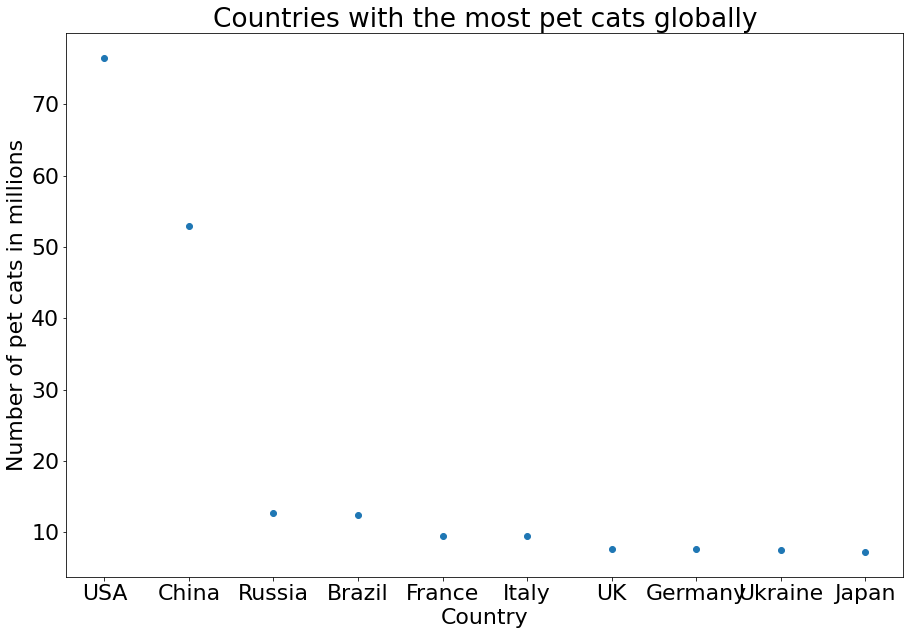

In [72]:
plt.figure(figsize=(15, 10))
plt.plot(countries, number_of_cats_in_millions, 'o')
# plt.bar(countries, number_of_cats_in_millions)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Countries with the most pet cats globally")
plt.show()

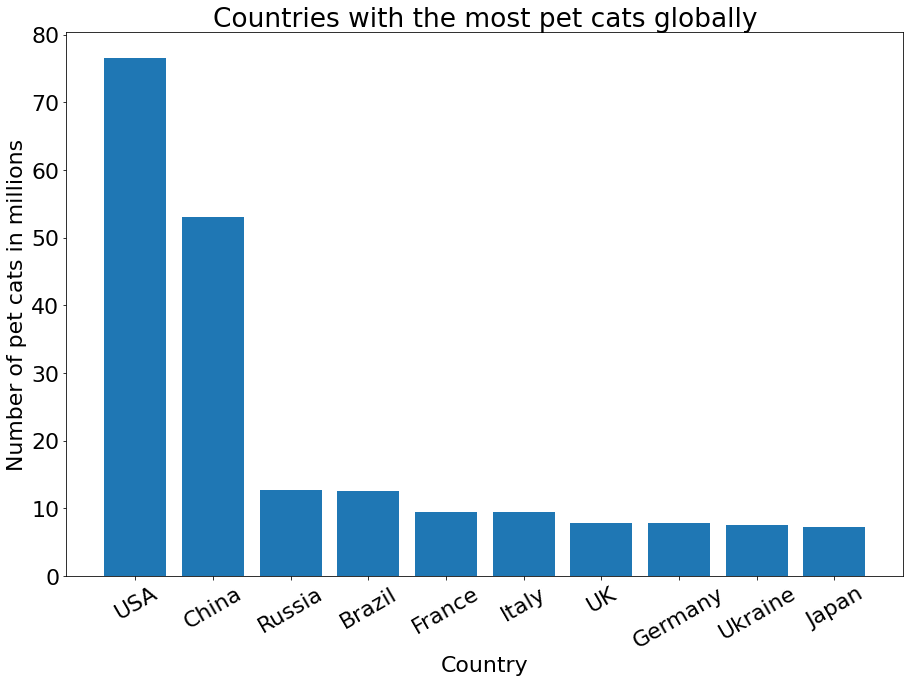

In [73]:
plt.figure(figsize=(15, 10))
plt.bar(countries, number_of_cats_in_millions)
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Countries with the most pet cats globally")
plt.show()

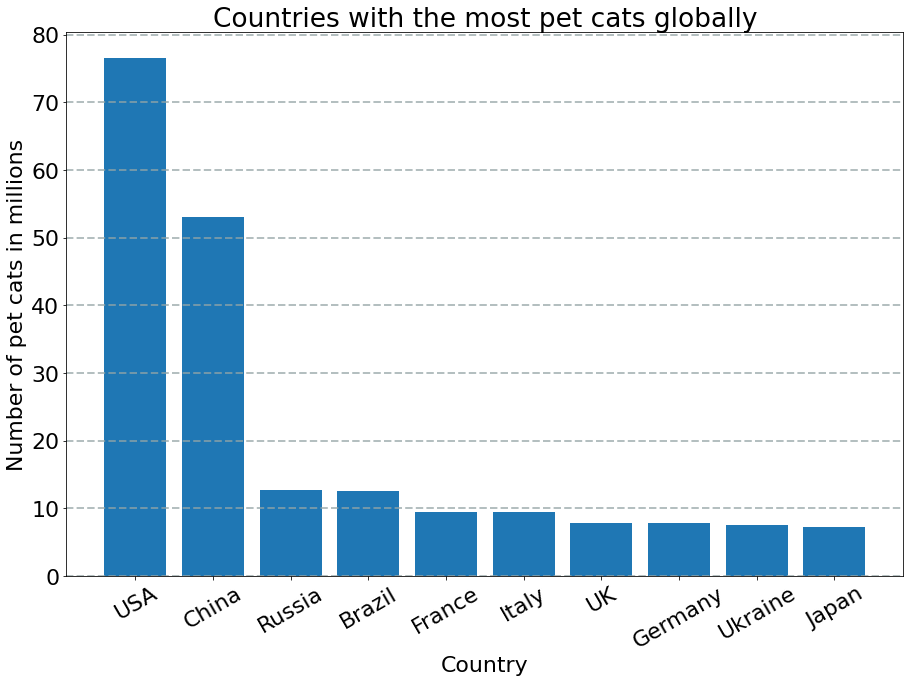

In [78]:
plt.figure(figsize=(15, 10))
plt.bar(countries, number_of_cats_in_millions)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Countries with the most pet cats globally")
plt.show()

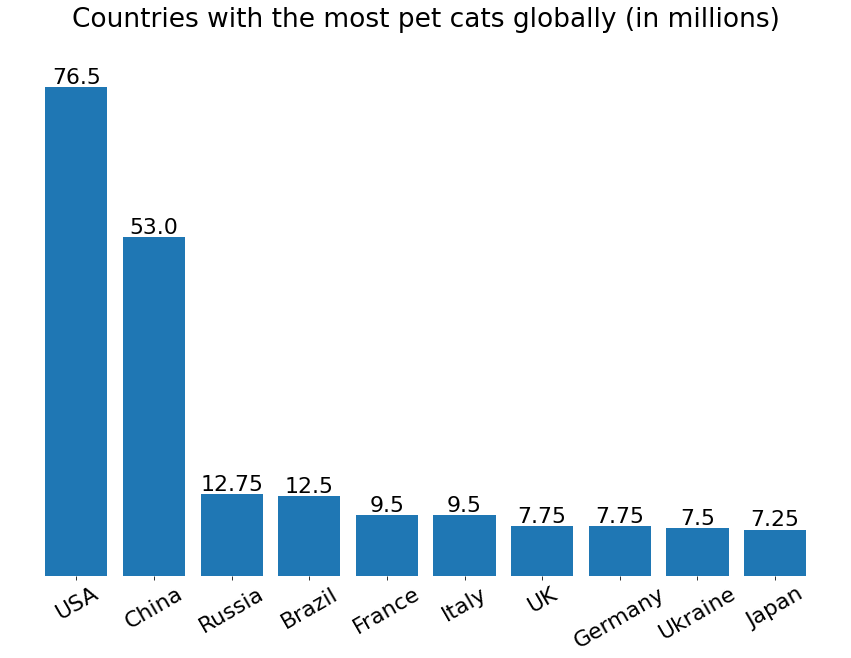

In [139]:
fig, ax = plt.subplots(figsize=(15, 10))
rects = ax.bar(countries, number_of_cats_in_millions)

for rect in rects:
        height = rect.get_height()
        ax.annotate(xy=(rect.get_x() + rect.get_width()/2., height),
                    text=height, ha='center', va='bottom')

for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    
ax.set(title="Countries with the most pet cats globally (in millions)", 
       yticklabels=[], ylim=(0,85))
ax.tick_params(left=False)

plt.xticks(rotation=30)
plt.show()